 # Cvičení 9. 
 ## Michal Béreš, Martina Litschmannová, Veronika Kubíčková

# Od intervalových odhadů k testům hypotéz
## Co je to statistický test hypotéz?

## Intervalový odhad a hladina významnosti

In [70]:
data = readxl::read_excel("data/uvod.xlsx")
head(data)

data
<dbl>
75.91
109.00
107.89
102.95
98.93
105.71


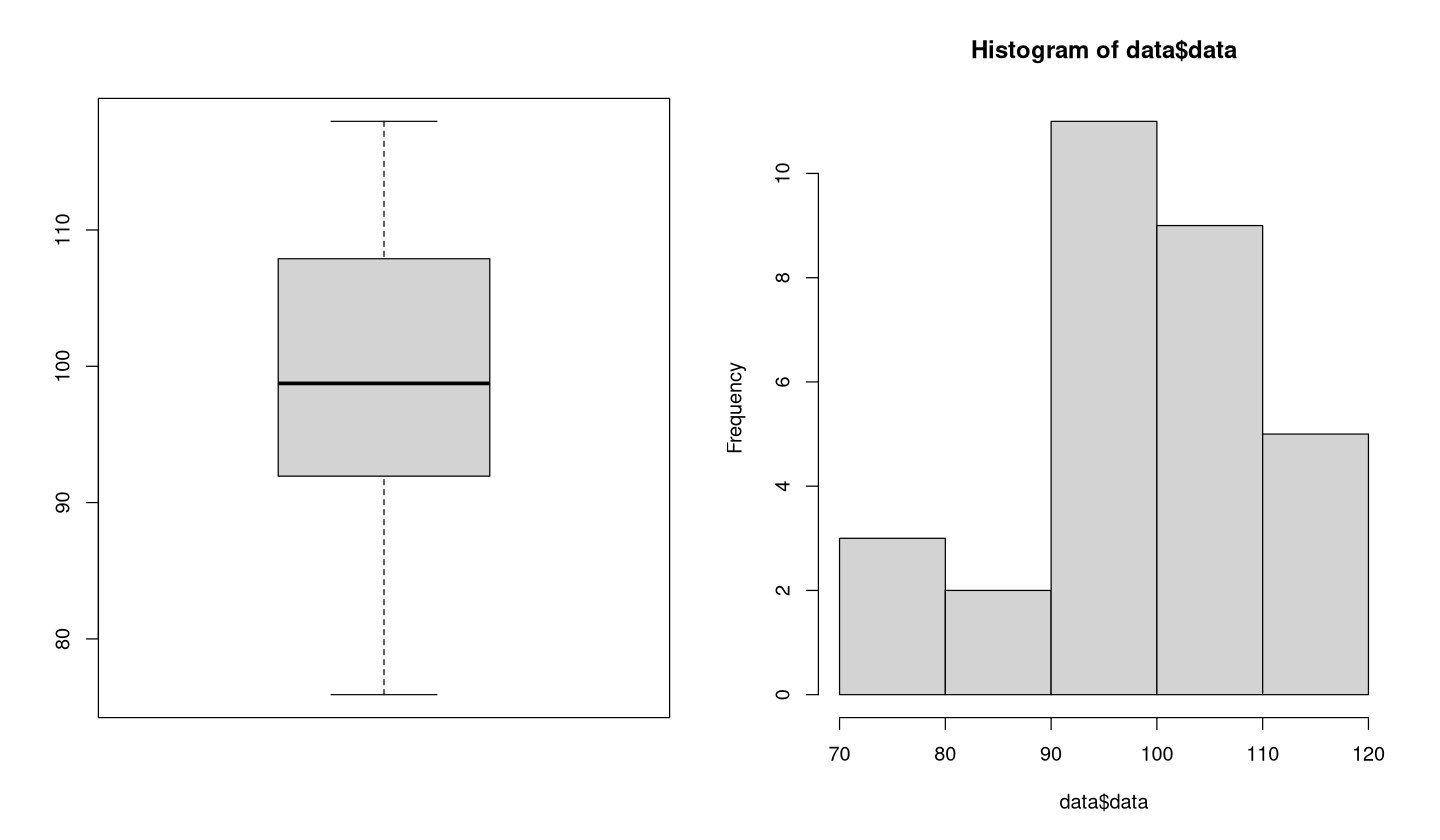

In [71]:
options(repr.plot.width = 12) # šířka grafů v Jupyteru
par(mfrow = c(1, 2))          # matice grafů 1x2

boxplot(data$data)
hist(data$data)

In [74]:
moments::skewness(data$data)       # šikmost
moments::kurtosis(data$data) - 3   # špičatost

shapiro.test(data$data)$p.value    # test normality

[1] -0.3286819

[1] -0.4337902

[1] 0.5374115

In [75]:
length(data$data)
mean(data$data)
sd(data$data)

[1] 30

[1] 99.18333

[1] 11.30856

[1]  75.91 109.00 107.89 102.95  98.93 105.71 106.50  98.56  87.34 100.95
[11]  94.90 115.10 110.58 105.19  96.59 112.53  98.41  95.45 117.97  91.94
[21] 109.61  96.75  76.21  89.03 101.36  90.18  92.96  78.83  90.56 117.61

# Příklady
## Příklad 1.
Máme výběr 216 pacientů a změřili jsme jejich bílkovinné sérum (soubor testy_jednovyberove.xlsx list bilk_serum). Ověřte, zda se průměrné bílkovinné sérum (Albumin) všech pacientů tohoto typu (populační průměr µ) statisticky významně liší od hodnoty 35 g/l.

In [1]:
# Načtení dat z xlsx souboru (pomoci balíčku readxl)
albumin = readxl::read_excel("data/testy_jednovyberove.xlsx",
                             sheet = "bilk_serum")
head(albumin)

Bílkovinné sérum (g/l)
<dbl>
33.874
34.718
34.957
34.758
35.280
34.621


In [3]:
colnames(albumin)="hodnoty"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.57   34.20   34.51   34.49   34.74   35.48 

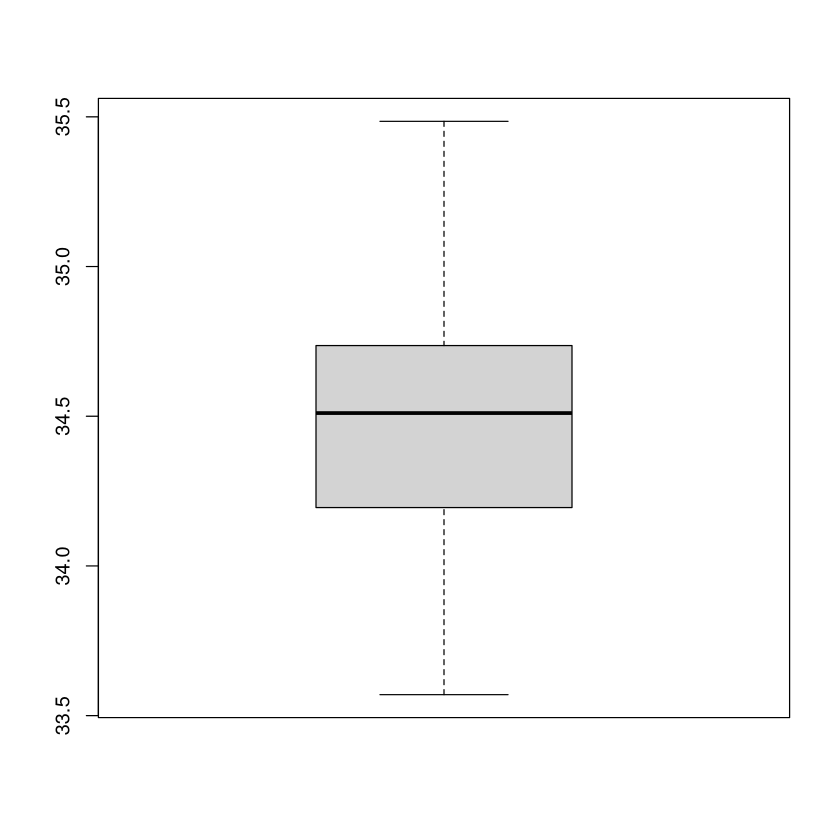

In [6]:
# Explorační analýza
boxplot(albumin$hodnoty)
summary(albumin$hodnoty)

In [5]:
length(albumin$hodnoty) # sd zaokrouhlujeme na 3 platné cifry
sd(albumin$hodnoty)     # sd a míry polohy zaokrouhlujeme na tisíciny

[1] 218

[1] 0.393683

**Test na míru polohy**

[1] -0.02816007

[1] -0.5720233

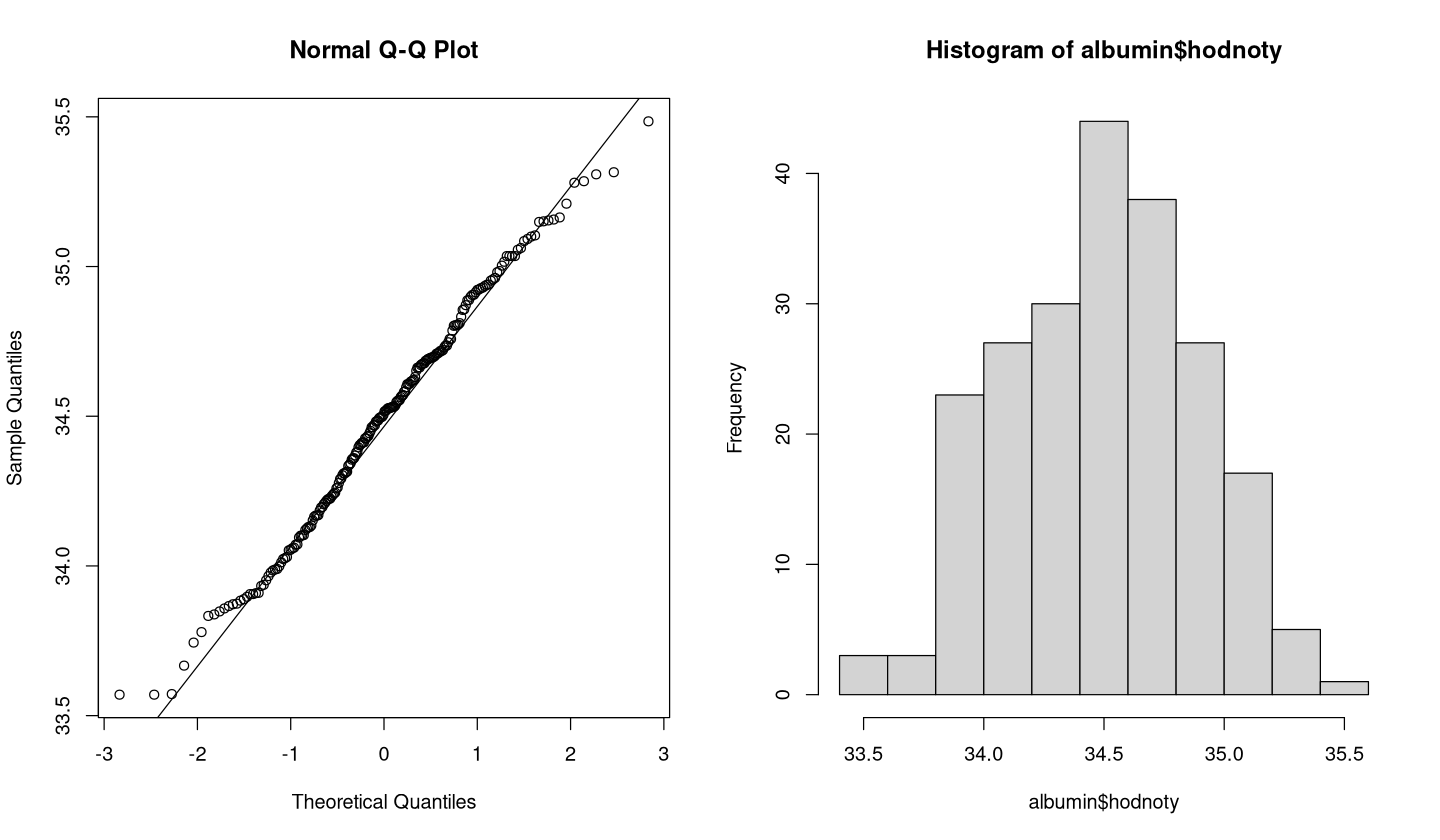

In [22]:
# Ověření normality - exploračně
moments::skewness(albumin$hodnoty)    # šikmost
moments::kurtosis(albumin$hodnoty)-3  # špičatost

options(repr.plot.width = 12) # šířka grafů v Jupyteru
par(mfrow = c(1, 2))          # matice grafů 1x2

qqnorm(albumin$hodnoty)
qqline(albumin$hodnoty)
hist(albumin$hodnoty)

In [12]:
# Pro konečné rozhodnutí o normalitě dat použijeme test normality.

# Předpoklad normality ověříme Shapirovovým - Wilkovovým testem.
# H0: Data jsou výběrem z normálního rozdělení.
# Ha: Data nejsou výběrem z normálního rozdělení.
shapiro.test(albumin$hodnoty)
# p-value > 0.05 -> Na hl. významnosti 0,05 nelze předpoklad normality zamítnout 


	Shapiro-Wilk normality test

data:  albumin$hodnoty
W = 0.99151, p-value = 0.2358


In [13]:
# normalita OK -> t.test

# H0: mu = 35 g/l
# Ha: mu <> 35 g/l

t.test(albumin$hodnoty, mu=35,
       alternative = "two.sided", conf.level=0.95)

# p-value < 0.05 -> Na hl. významnosti 0,05 zamítáme nulovou hypotézu 
# ve prospěch hypotézy alternativní 
# Střední hodnota albuminu se statisticky významně liší od 35 g/l.


	One Sample t-test

data:  albumin$hodnoty
t = -19.249, df = 217, p-value < 0.00000000000000022
alternative hypothesis: true mean is not equal to 35
95 percent confidence interval:
 34.43421 34.53932
sample estimates:
mean of x 
 34.48677 


## Příklad 2.
V souboru testy_jednovyberove.xlsx list preziti jsou uvedeny doby přežití pro 100 pacientů s rakovinou plic léčených novým lékem. Z předchozích studií je známo, že průměrné přežití takových pacientů bez podávání nového léku je 22,2 měsíce. Lze na základě těchto dat usoudit, že nový lék prodlužuje přežití?

In [23]:
# Načtení dat z xlsx souboru (pomoci balíčku readxl)
preziti = readxl::read_excel("data/testy_jednovyberove.xlsx",
                             sheet = "preziti")   
head(preziti)

Doba přežití (měsíc)
<dbl>
27
6
9
62
10
10


In [24]:
colnames(preziti)="hodnoty"

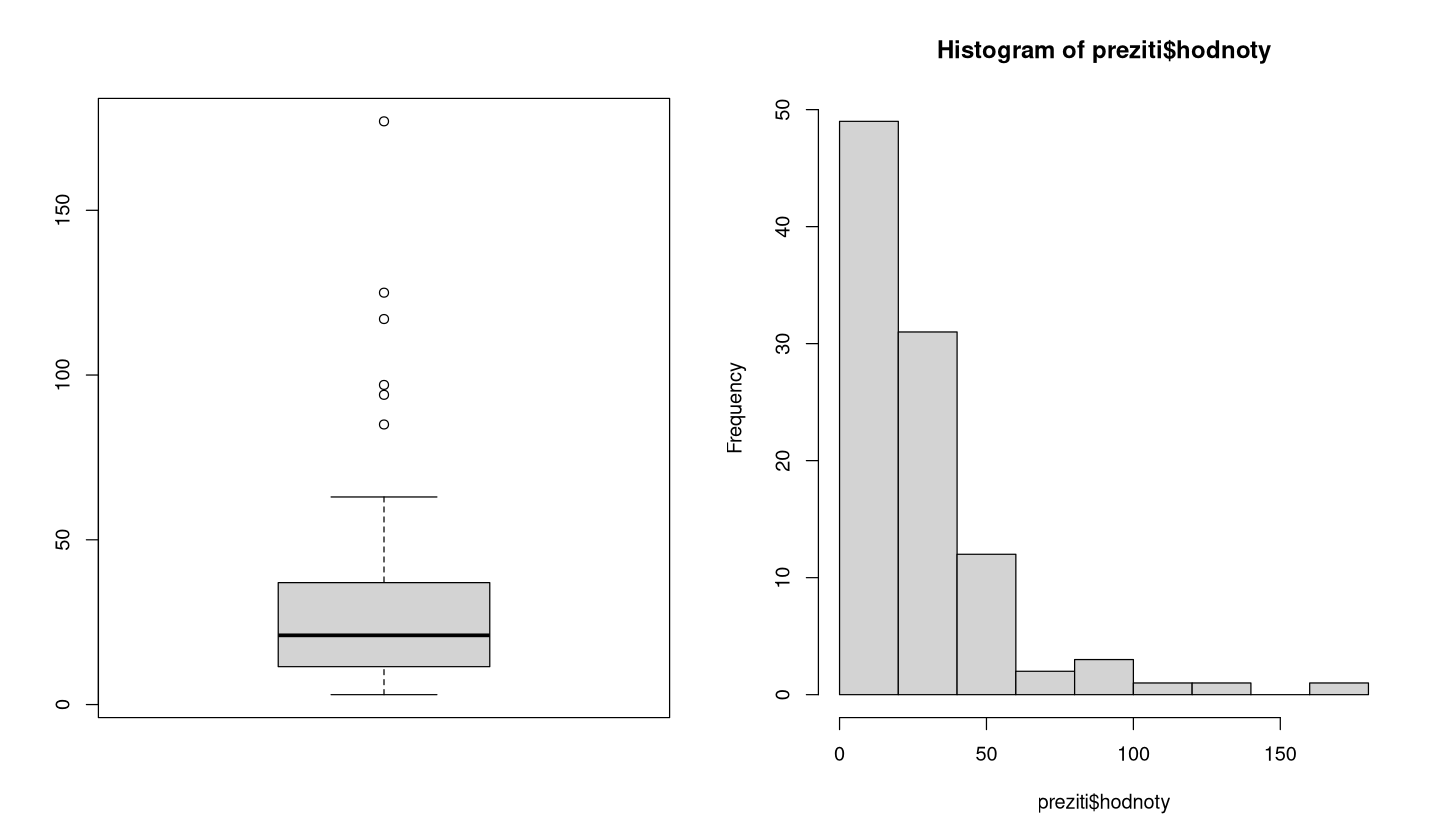

In [25]:
## Explorační analýza
par(mfrow = c(1, 2))          # matice grafů 1x2

boxplot(preziti$hodnoty)
hist(preziti$hodnoty)

**Data obsahují OP -> můžeme je odstranit. Nebo si také všimnout, že se pravděpdobně jedná o exponenciální rozdělení a OP tam ve skutečnosti nejsou (rozdělení se tak prostě chová).**

In [28]:
# Data obsahují odlehlá pozorování. Pomoci f-ce boxplot je umíme vypsat.
pom=boxplot(preziti$hodnoty, plot = FALSE)
pom$out
# rozhodli-li jsme se pro odstranění odlehlých hodnot, pak 
preziti$hodnoty.bez=preziti$hodnoty # doporučujeme nepřepisovat původní data
preziti$hodnoty.bez[preziti$hodnoty %in% pom$out]=NA

[1] 177 125  85  94 117  97

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   3.00   11.00   20.00   23.70   32.75   63.00       6 

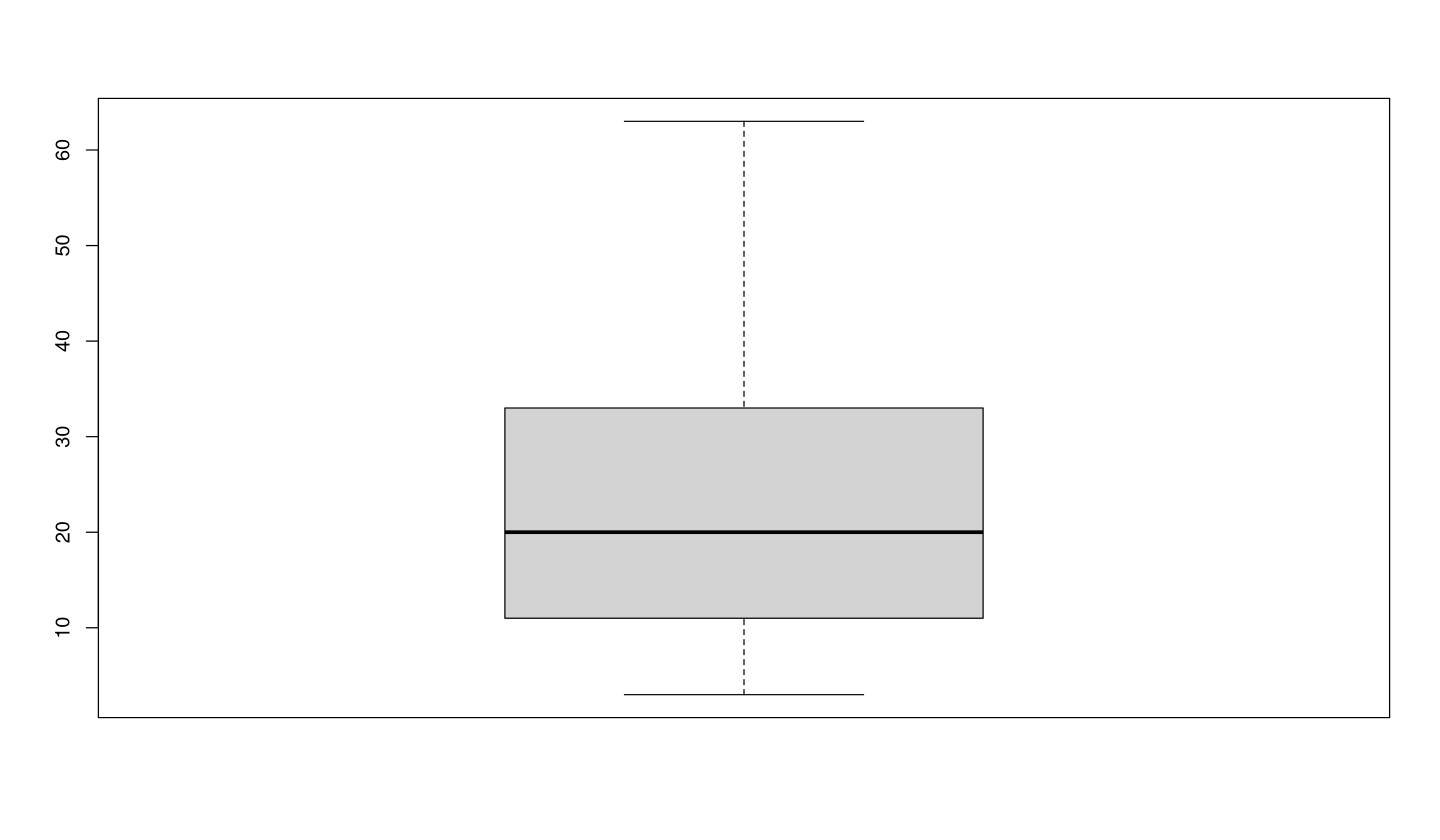

In [29]:
## Explorační analýza pro data bez odlehlých pozorování
boxplot(preziti$hodnoty.bez)
summary(preziti$hodnoty.bez,na.rm=TRUE)

In [30]:
length(na.omit(preziti$hodnoty.bez))   # sd zaokrouhlujeme na 3 platné cifry
sd(preziti$hodnoty.bez,na.rm=TRUE)     # sd a míry polohy zaokrouhlujeme na desetiny

[1] 94

[1] 15.34396

**Test o míře polohy (střední hodnotě / mediánu)**

[1] 0.8330227

[1] -0.1748022

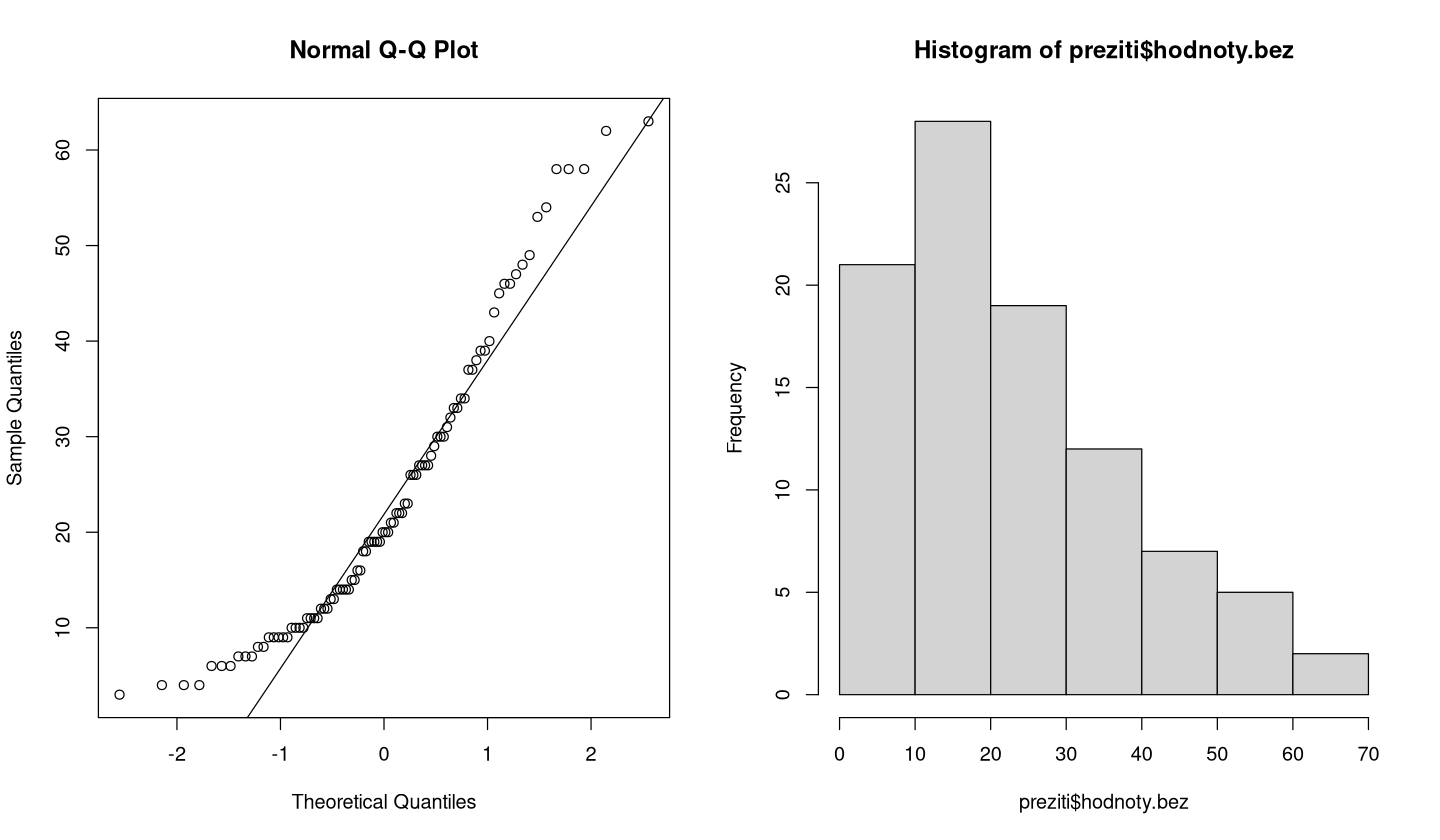

In [31]:
# Ověření normality - exploračně
moments::skewness(preziti$hodnoty.bez,na.rm=TRUE)
moments::kurtosis(preziti$hodnoty.bez,na.rm=TRUE)-3

par(mfrow = c(1, 2))          # matice grafů 1x2

qqnorm(preziti$hodnoty.bez)
qqline(preziti$hodnoty.bez)
hist(preziti$hodnoty.bez)

# QQ - graf i histogram ukazují, že výběr pravděpodobně není výběrem z normálního rozdělení.
# Šikmost i špičatost odpovídá norm. rozdělení. Pro konečné rozhodnutí o normalitě dat použijeme
# test normality.

In [32]:
# Předpoklad normality ověříme Shapirovovým . Wilkovovým testem.
shapiro.test(preziti$hodnoty.bez)
# p-value < 0.05 -> Na hl. významnosti 0.05 zamítáme předpoklad normality 


	Shapiro-Wilk normality test

data:  preziti$hodnoty.bez
W = 0.91835, p-value = 0.00002021


In [34]:
# explorační posouzení symetrie - výše hist. a šikmost 

# Předpoklad symetrie - ověření testem
# H0: data pocházejí ze symetrického rozdělení
# HA: ~H0

lawstat::symmetry.test(preziti$hodnoty.bez,boot=FALSE)
# p-value < 0.05 -> Na hl. významnosti 0.05 zamítáme předpoklad symetrie 


	Symmetry test by Miao, Gel, and Gastwirth (2006)

data:  preziti$hodnoty.bez
Test statistic = 3.1256, p-value = 0.001774
alternative hypothesis: the distribution is asymmetric.


In [35]:
# normalita zamítnuta -> symetrie zamítnuta -> Sign. test
# H0: median = 22,2 měsíců
# Ha: median > 22,2 měsíců

BSDA::SIGN.test(preziti$hodnoty.bez, md=22.2,
                alternative="greater", conf.level=0.95)

# p-value > 0.05 -> Na hl. významnosti 0,05 nelze zamítnout nulovou hypotézu 
# Medián doby přežití není statisticky významně větší než 22,2 měsíců.


	One-sample Sign-Test

data:  preziti$hodnoty.bez
s = 40, p-value = 0.9393
alternative hypothesis: true median is greater than 22.2
95 percent confidence interval:
 16.99182      Inf
sample estimates:
median of x 
         20 

Achieved and Interpolated Confidence Intervals: 

                  Conf.Level  L.E.pt U.E.pt
Lower Achieved CI     0.9393 18.0000    Inf
Interpolated CI       0.9500 16.9918    Inf
Upper Achieved CI     0.9605 16.0000    Inf


## Příklad 3.
Automat vyrábí pístové kroužky o daném průměru. Výrobce udává, že směrodatná odchylka průměru kroužku je 0,05 mm. K ověření této informace bylo náhodně vybráno 80 kroužků a vypočtena směrodatná odchylka jejich průměru 0,04 mm. Lze tento rozdíl považovat za statisticky významný ve smyslu zlepšení kvality produkce? Ověřte čistým testem významnosti. Předpokládejte, že průměr pístových kroužků má normální rozdělení.

In [36]:
# Test o směrodatné odchylce 

# Předpokládáme normalitu dat (dle zadání)
n = 80   # rozsah souboru 
s = 0.04 # mm .... výběrová směrodatná odchylka (bodový odhad sm. odchylky)

# H0: sigma = 0.05 mm
# Ha: sigma < 0.05 mm

x.obs = (n-1)*s^2/0.05^2
x.obs

[1] 50.56

In [37]:
p.hodnota = pchisq(x.obs,n-1)
p.hodnota

# p.hodnota < 0.05 -> Na hladině významnosti 0,05 zamítáme nulovou hypotézu 
# ve prospěch alternativní hypotézy
# Směrodatná odchylka průměru kroužku je statisticky významně menší než 0,05 mm.

[1] 0.005294016

## Příklad 4.
Automat vyrábí pístové kroužky o daném průměru. Výrobce udává, že směrodatná odchylka průměru kroužku je 0,05 mm. K ověření této informace bylo náhodně vybráno 80 kroužků a byl změřen jejich průměr (soubor testy_jednovyberove.xlsx list krouzky). Lze zjištěné výsledky považovat za statisticky významné ve smyslu zlepšení kvality produkce? Ověřte čistým testem významnosti.

In [38]:
# Načtení dat z xlsx souboru (pomoci balíčku readxl)
krouzky = readxl::read_excel("data/testy_jednovyberove.xlsx",
                             sheet = "krouzky")  
head(krouzky)

Průměr kroužku (mm)
<dbl>
10.00
10.03
9.96
10.00
9.98
10.02


In [39]:
colnames(krouzky)="hodnoty"

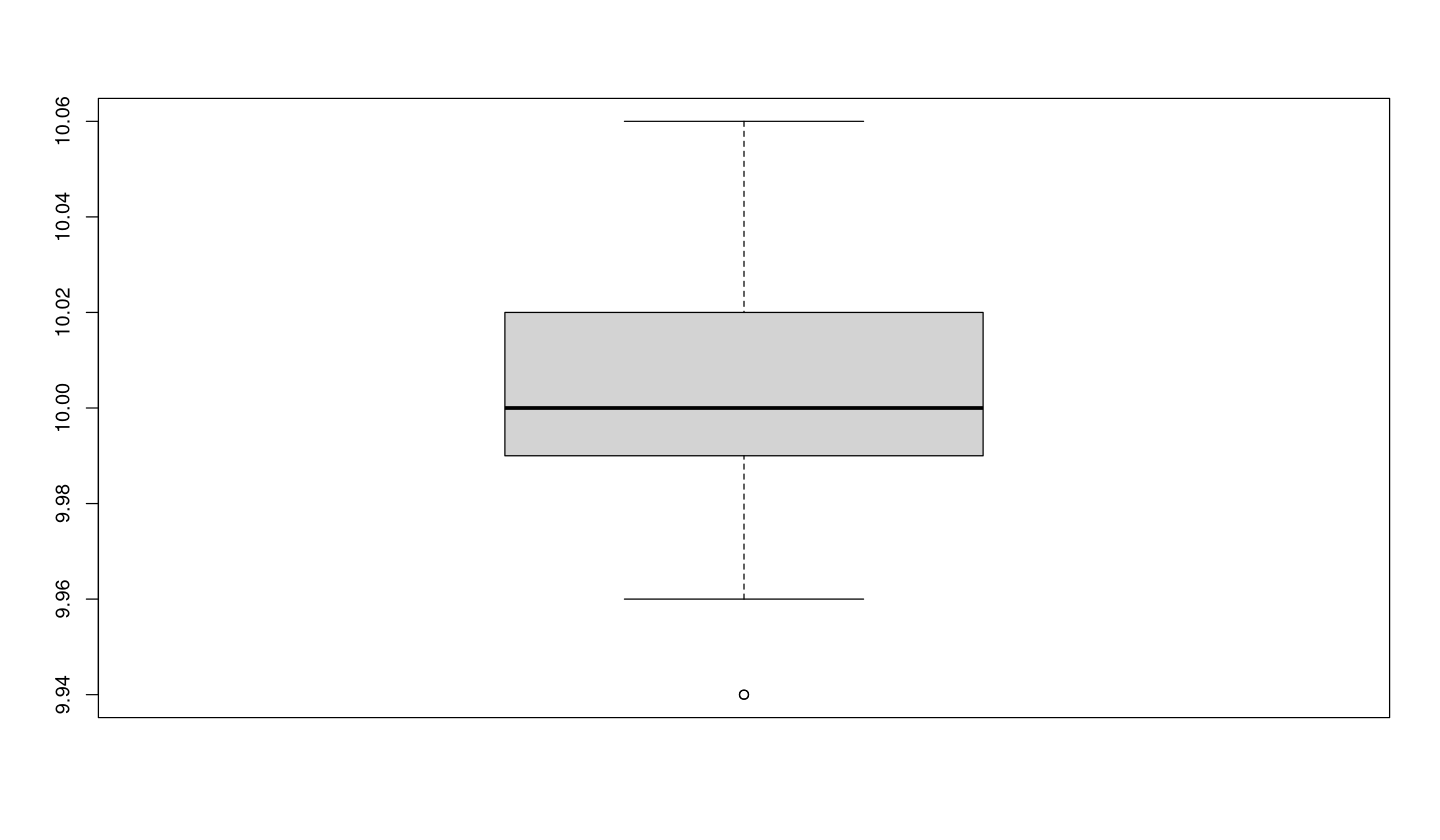

In [40]:
## Explorační analýza
boxplot(krouzky$hodnoty)

In [42]:
# Data obsahují odlehlá pozorování. Pomoci f-ce boxplot je umíme vypsat.
pom = boxplot(krouzky$hodnoty, plot = FALSE)
pom$out
# rozhodli-li jsme se pro odstranění odlehlých hodnot, pak 
krouzky$hodnoty.bez = krouzky$hodnoty
krouzky$hodnoty.bez[krouzky$hodnoty %in% pom$out] = NA

[1] 9.94 9.94

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   9.96    9.99   10.01   10.01   10.02   10.06       2 

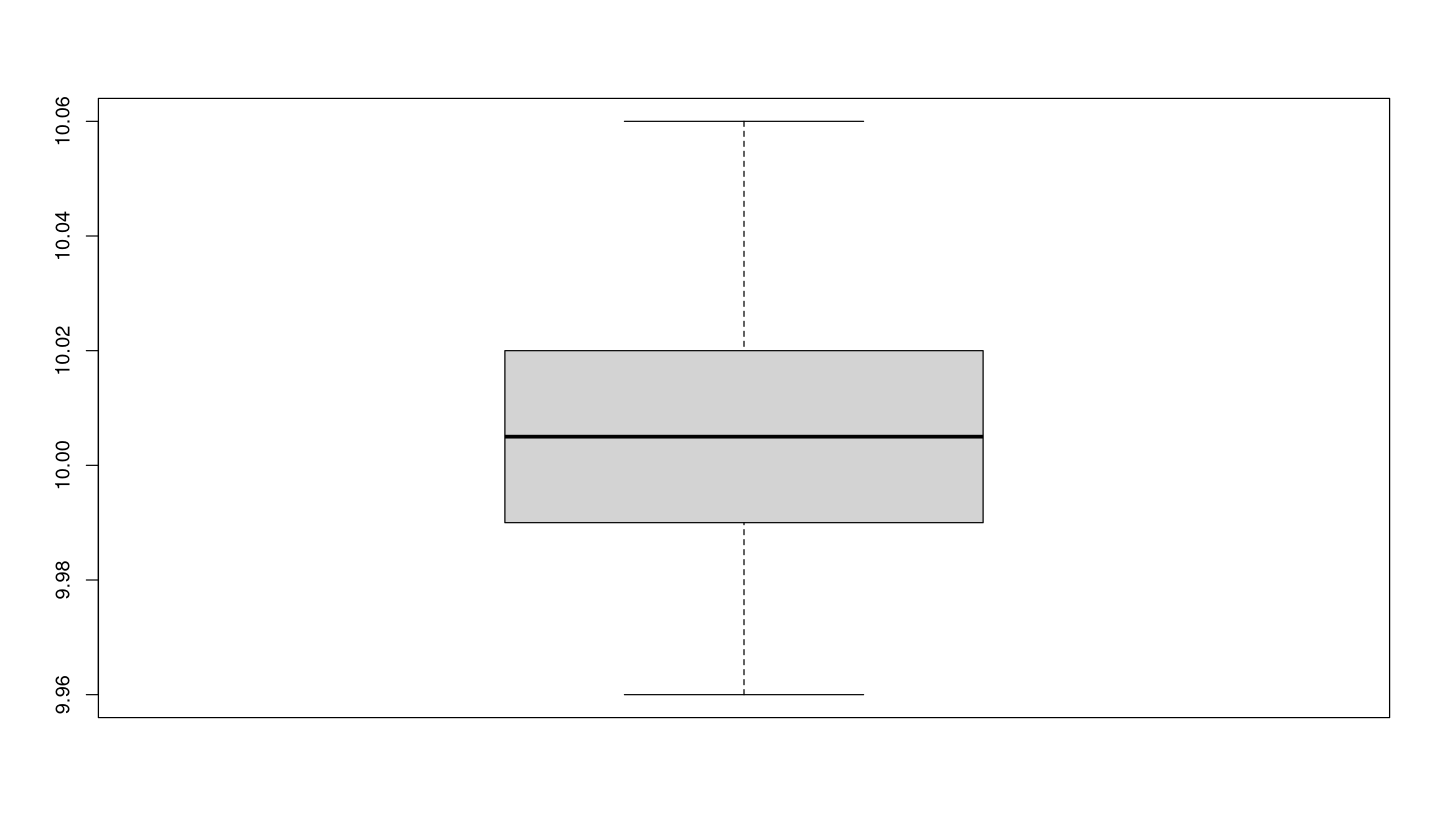

In [43]:
# Explorační analýza pro data bez odlehlých pozorování
summary(krouzky$hodnoty.bez,na.rm=TRUE)
boxplot(krouzky$hodnoty.bez)

In [44]:
length(na.omit(krouzky$hodnoty.bez))# sd zaokrouhlujeme na 3 platné cifry
sd(krouzky$hodnoty.bez,na.rm=TRUE)  # sd a míry polohy zaokrouhlujeme na tisíciny

[1] 78

[1] 0.02484618

[1] 0.05492792

[1] -0.3960399

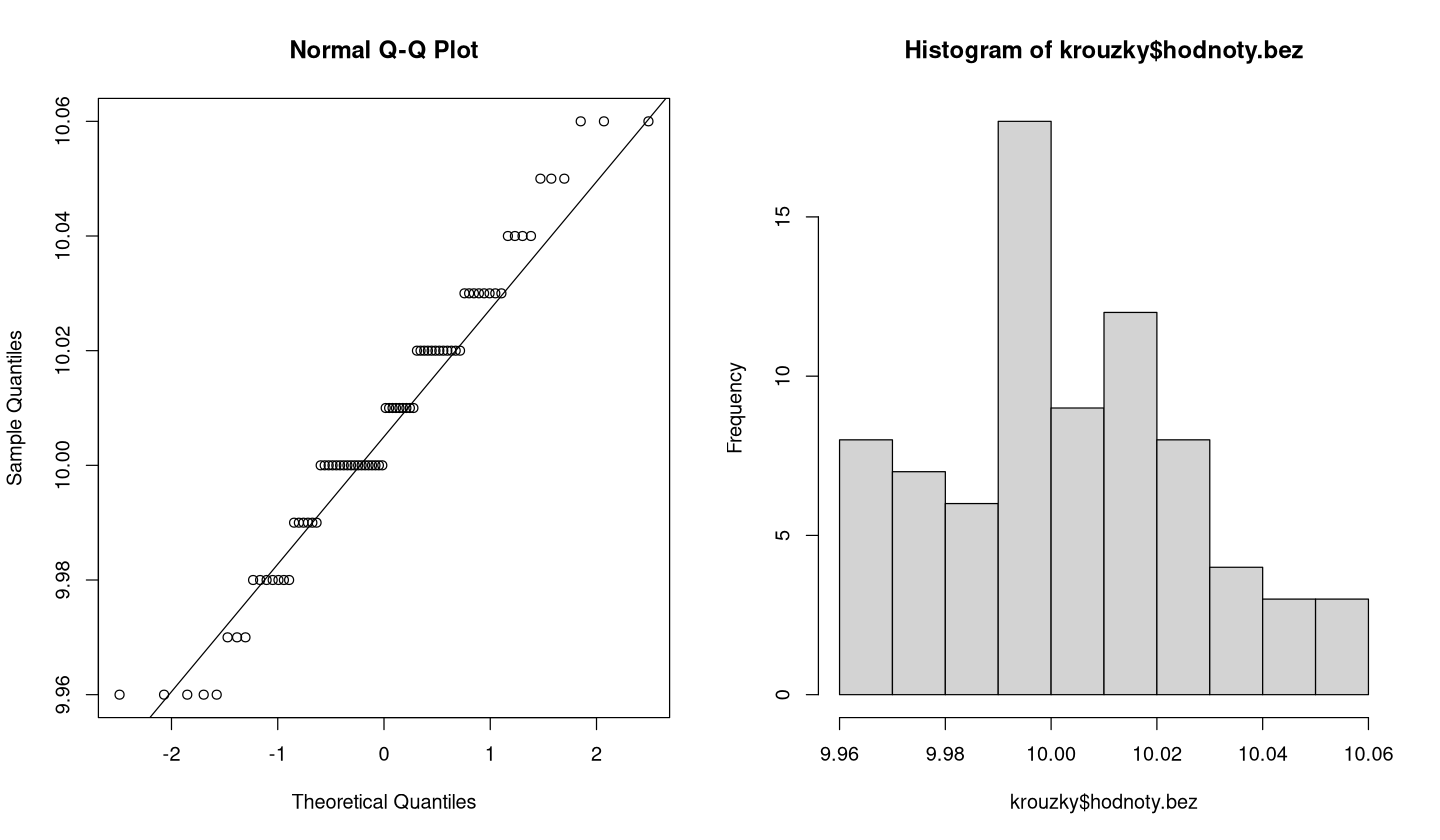

In [45]:
# Ověření normality - exploračně
moments::skewness(krouzky$hodnoty.bez,na.rm=TRUE)
moments::kurtosis(krouzky$hodnoty.bez,na.rm=TRUE)-3

par(mfrow = c(1, 2))          # matice grafů 1x2

qqnorm(krouzky$hodnoty.bez)
qqline(krouzky$hodnoty.bez)
hist(krouzky$hodnoty.bez)
# Šikmost i špičatost odpovídá norm. rozdělení. Pro konečné rozhodnutí o normalitě dat použijeme

In [46]:
# test normality.
# Předpoklad normality ověříme Shapirovovým . Wilkovovým testem.
shapiro.test(krouzky$hodnoty.bez)
# p-value > 0.05 -> Na hl. významnosti 0,05 nelze předpoklad normality zamítnout 


	Shapiro-Wilk normality test

data:  krouzky$hodnoty.bez
W = 0.97005, p-value = 0.0628


In [50]:
# test na míru variability -> test o rozptylu

# H0: sigma = 0,05 mm
# Ha: sigma < 0,05 mm
EnvStats::varTest(krouzky$hodnoty.bez,sigma.squared = 0.05^2,
                  alternative = "less")

# p-value < 0.05 -> Na hladině významnosti 0,05 zamítáme H0 ve prospěch Ha 

Warning message in is.not.finite.warning(x):
“There were 2 nonfinite values in x : 2 NA's”
Warning message in EnvStats::varTest(krouzky$hodnoty.bez, sigma.squared = 0.05^2, :
“2 observations with NA/NaN/Inf in 'x' removed.”



	Chi-Squared Test on Variance

data:  krouzky$hodnoty.bez
Chi-Squared = 19.014, df = 77, p-value = 0.000000000001354
alternative hypothesis: true variance is less than 0.0025
95 percent confidence interval:
 0.0000000000 0.0008225911
sample estimates:
    variance 
0.0006173327 


In [52]:
# Jak najít 95% intervalový odhad směrodatné odchylky?
pom = EnvStats::varTest(krouzky$hodnoty.bez,sigma.squared = 0.05^2,
                        alternative = "less", conf.level=0.95)

sqrt(pom$conf.int)

Warning message in is.not.finite.warning(x):
“There were 2 nonfinite values in x : 2 NA's”
Warning message in EnvStats::varTest(krouzky$hodnoty.bez, sigma.squared = 0.05^2, :
“2 observations with NA/NaN/Inf in 'x' removed.”


LCL        UCL 
0.00000000 0.02868085 
attr(,"conf.level")
[1] 0.95

## Příklad 5.
Firma TT udává, že 1% jejich rezistorů nesplňuje požadovaná kritéria. V testované dodávce 1000 ks bylo nalezeno 15 nevyhovujících rezistorů. Potvrzuje tento výsledek tvrzení TT? Ověřte čistým testem významnosti.

In [56]:
n = 1000   # rozsah výběru 
x = 15     # počet "úspěchů"
p = x/n    # relativní četnost (bodový odhad pravděpodobnosti)
p 

[1] 0.015

In [59]:
# Ověření předpokladů
9/(p*(1-p))
# Dále předpokládáme  n/N < 0.05, tj. že daná populace (rezistorů) má rozsah 
# alespoň 1000/0.05 = 1000*20 = 20 000 rezistorů, což je asi vcelku reálný předpoklad :-)

[1] 609.1371

In [60]:
## Clopperův - Pearsonův (exaktní) test
## H0: pi = 0.01
## Ha: pi > 0.01

binom.test(x,n,0.01,alternative="greater",conf.level=0.95)

# Na hladině významnosti 0,05 nezamítáme H0 
# Nelze očekávat, že podíl vadných rezistorů ve výrobě statisticky významně
# převyšuje 1 %.


	Exact binomial test

data:  x and n
number of successes = 15, number of trials = 1000, p-value = 0.08241
alternative hypothesis: true probability of success is greater than 0.01
95 percent confidence interval:
 0.009268431 1.000000000
sample estimates:
probability of success 
                 0.015 
